In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BernGreedy:
    def __init__(self, K):
        self.alpha = np.ones(K)
        self.beta = np.ones(K)
        
    def act(self,):
        theta_hat = self.alpha / (self.alpha + self.beta)
        return np.argmax(theta_hat) # an integer
        
    def update(self, k, r):
        self.alpha[k] += r
        self.beta[k] += 1-r
        
class BernThompson:
    def __init__(self, K):
        self.alpha = np.ones(K)
        self.beta = np.ones(K)
        
    def act(self,):
        theta_hat = np.random.beta(self.alpha, self.beta)
        return np.argmax(theta_hat) # an integer
        
    def update(self, k, r):
        self.alpha[k] += r
        self.beta[k] += 1-r

In [3]:
class BernouliBandit:
    def __init__(self, T=100, K=10, theta=None):
        self.T = T
        self.K = K  # K arms
        if theta is None:
            self.theta = np.random.rand(K)
        else:
            self.theta = theta
        self.greedy_regrets = np.zeros(T)
        self.ts_regrets = np.zeros(T)
    
    def apply(self, k):
        r = np.random.binomial(1, self.theta[k])
        return r
    
    def run(self):
        greedy_player = BernGreedy(self.K)
        ts_player = BernThompson(self.K)
        
        optimal_r = 1
        for t in range(self.T):
            greedy_k = greedy_player.act()
            greedy_r = self.apply(greedy_k)
            greedy_player.update(greedy_k, greedy_r)
            
            ts_k = ts_player.act()
            ts_r = self.apply(ts_k)
            ts_player.update(ts_k, ts_r)
            
            if t>0:
                self.greedy_regrets[t] = self.greedy_regrets[t-1] + optimal_r - greedy_r
                self.ts_regrets[t] = self.ts_regrets[t-1] + optimal_r - ts_r
            else:
                self.greedy_regrets[t] = optimal_r - greedy_r
                self.ts_regrets[t] = optimal_r - ts_r
        
    def eval_plot(self):
        plt.figure()
        plt.plot(self.greedy_regrets, 'r', label='greedy')
        plt.plot(self.ts_regrets,'g', label='thompson sample')
        plt.legend()
        plt.xlabel('Time steps')
        plt.ylabel('Cumulative regrets')

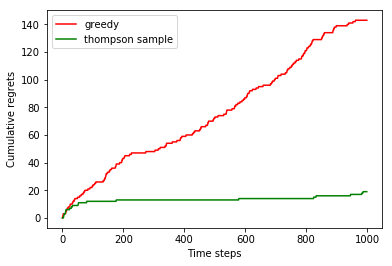

In [11]:
np.random.seed(10000)

berbandit = BernouliBandit(T=1000)
berbandit.run()
berbandit.eval_plot()